# Assignment 3

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

In [2]:
df = pd.read_csv('sonar.all-data', header = None, prefix='x')
df.head()

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


__Features(x0-x59)__ in the range 0.0 to 1.0.  Each number
represents the energy within a particular frequency band, integrated over
a certain period of time.<br>
The label in __target variable(x60)__ contains the letter "R" if the object
is a rock and "M" if it is a mine (metal cylinder).

In [3]:
df.shape

(208, 61)

So, there are 208 rows and 61 column of which x60 column is target variable.

In [4]:
print(df.isnull().sum())

x0     0
x1     0
x2     0
x3     0
x4     0
x5     0
x6     0
x7     0
x8     0
x9     0
x10    0
x11    0
x12    0
x13    0
x14    0
x15    0
x16    0
x17    0
x18    0
x19    0
x20    0
x21    0
x22    0
x23    0
x24    0
x25    0
x26    0
x27    0
x28    0
x29    0
      ..
x31    0
x32    0
x33    0
x34    0
x35    0
x36    0
x37    0
x38    0
x39    0
x40    0
x41    0
x42    0
x43    0
x44    0
x45    0
x46    0
x47    0
x48    0
x49    0
x50    0
x51    0
x52    0
x53    0
x54    0
x55    0
x56    0
x57    0
x58    0
x59    0
x60    0
Length: 61, dtype: int64


In [5]:
conversion = {
    'M': 1,
    'R': 0
}
df['x60'] = df['x60'].map(conversion)

In [6]:
df.describe()


,x0,x1,x2,x3,x4,x5,x6,x7,x8,x9,...,x51,x52,x53,x54,x55,x56,x57,x58,x59,x60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507,0.533654
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031,0.500070
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600,0.000000
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100,0.000000
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300,1.000000
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525,1.000000
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900,1.000000


The data is skewed toward right by observing mean and std

In [7]:
pd.value_counts(df['x60'])

1    111
0     97
Name: x60, dtype: int64

So, there are 111 1(metal cylinder) and 97 0(rock) out of 208.

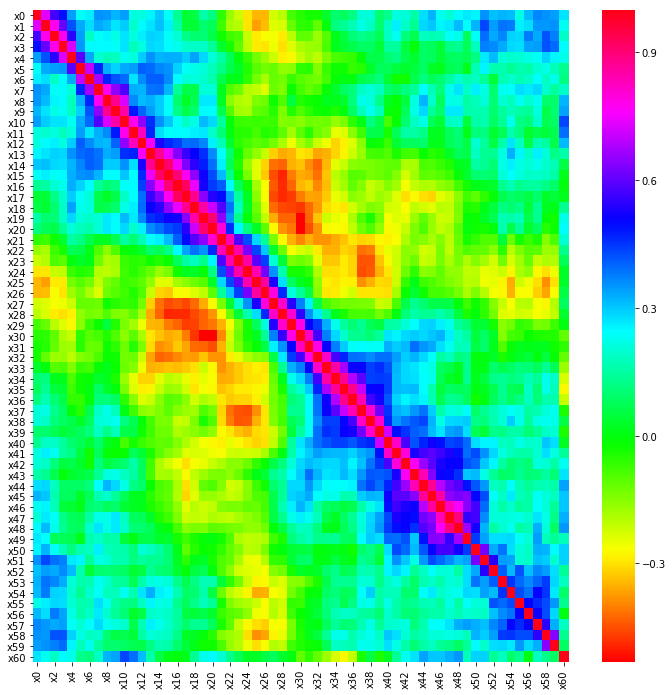

In [8]:
plt.figure(figsize=(12, 12))
sns.heatmap(df.corr(),cmap='hsv')

There is some correlation between adjecent features, which is expected as it is given that the integration aperture for higher frequencies
occur later in time, since these frequencies are transmitted later during
the chirp.

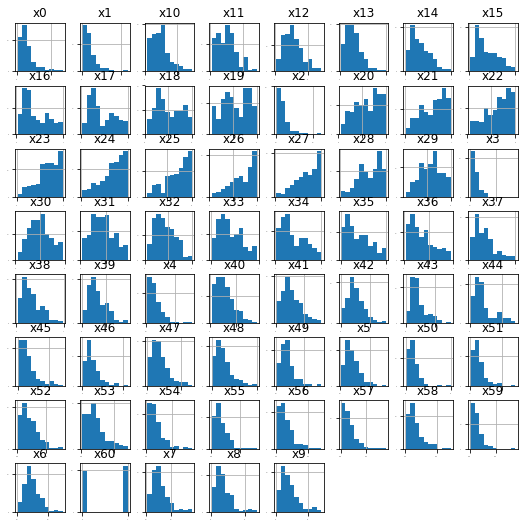

In [9]:
df.hist(figsize=(9,9),xlabelsize=1, ylabelsize=1)
plt.show()

Most of the features are __Right Skewed__. To prevent it we are using a square root transformation

In [10]:
df = np.sqrt(df)

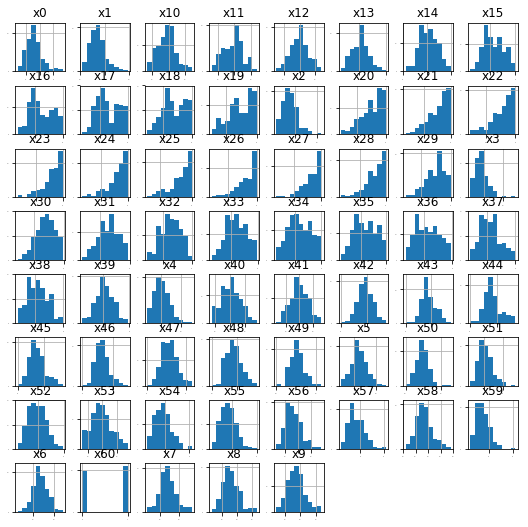

In [11]:
df.hist(figsize=(9,9),xlabelsize=1, ylabelsize=1)
plt.show()

Now, the data is more towards non-skewed i.e symmetric.<br>
To prevent __Data Leaking__ first the data is split into train test than the data is Standardized <br>
But first lets check outlier in the data they may be the case for skewness or they may hinder with our model afterwards

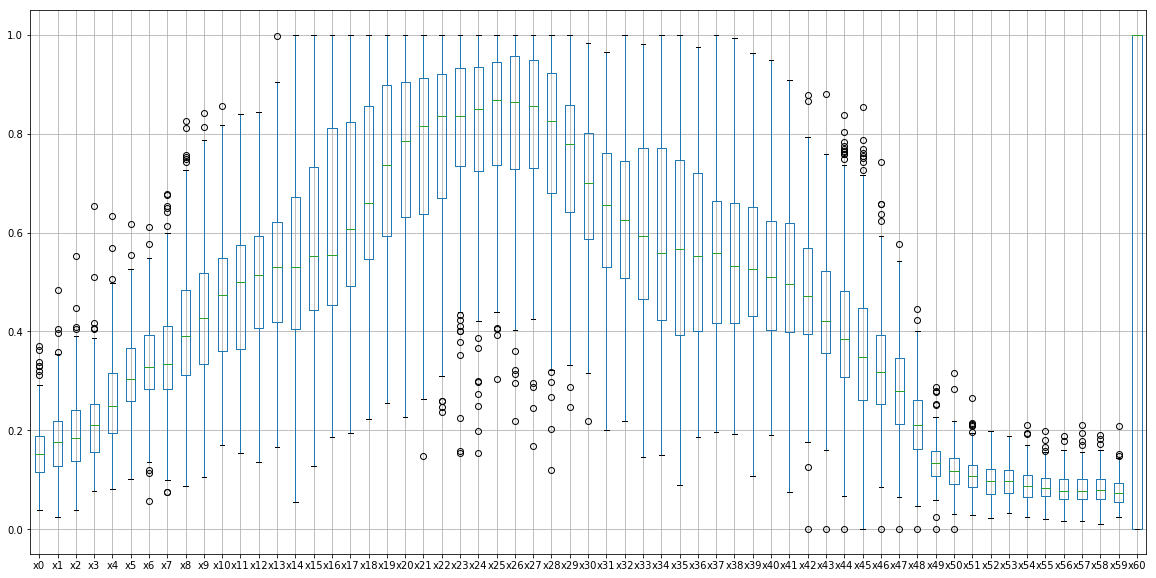

In [12]:
df.boxplot(figsize=(20,10))
plt.show()

As we can see some outliers inthe data, lets use IQR(Inter-quartile range) to get the oulier if the value is in extreme of 1.5*IQR it is an outlier

In [13]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - 1.5*IQR
r_bound = Q3 + 1.5*IQR
outlier = df[(df<l_bound) | (df> r_bound)]

In [14]:
outl_index = outlier.dropna( how= 'all',axis=0,thresh = 7).index
outl_index

Int64Index([95, 98, 136, 146], dtype='int64')

Here 4 rows with outlier greater than 7, we will remove these rows as this will hinder our data.<br>
Generally the outlier are removed first but since we just want to use it in the model so we have done transformation first.

In [15]:
df.drop(index = outl_index, inplace = True)

In [16]:
df.shape

(204, 61)

In [17]:
X = df.drop(['x60'],axis=1)
y = df['x60']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [18]:
sc= StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

As the Standardization as no efffect on Decision Tree and Random Forest but in Support Vector Machine (SVM) the optimal hyperplane is influenced by the scale of the input features and it's therefore recommended that data be standardized

In [19]:
models = []
models.append(('RF', RandomForestClassifier(n_estimators = 10,random_state = 40)))
models.append(('CART', DecisionTreeClassifier()))
models.append(('SVM', SVC(gamma='auto')))

In [20]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=7)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f" % (name, cv_results.mean())
    print(msg)

RF: 0.787619
CART: 0.717143
SVM: 0.774762


Hyper tuning the model with maximum accuracy i.e. SVM

In [21]:
c_values = [0.1, 0.3, 0.5, 0.7, 0.9, 1.0, 1.3, 1.5, 1.7, 2.0]
kernel_values = ['linear', 'poly', 'rbf', 'sigmoid']
param_grid = dict(C=c_values, kernel=kernel_values)
model = SVC(gamma = 'auto')
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=10,iid =False)
grid_r = grid.fit(X_train, y_train)

In [22]:
cv_results = grid_r.cv_results_
scores_mean = cv_results['mean_test_score']
scores_mean = np.array(scores_mean).reshape(len(c_values),len(kernel_values))

Text(0, 0.5, 'CV Average Score')

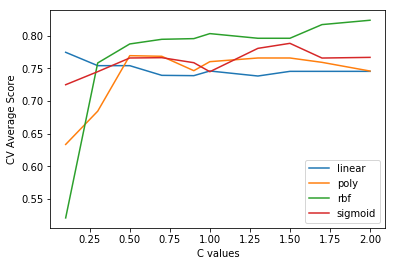

In [23]:
df1 = pd.DataFrame(scores_mean,columns = kernel_values,index = c_values)
plt.plot(df1)
plt.legend(df1.columns)
plt.xlabel("C values")
plt.ylabel("CV Average Score")

Its clearly visible that the best score occur at kernel- 'rbf' and C value = 2

In [24]:
grid_r.best_score_

0.8239194139194138

In [25]:
grid_r.best_estimator_

SVC(C=2.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [26]:
sc = SVC(C=2,kernel='rbf')
sc.fit(X_train,y_train)

SVC(C=2, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [27]:
y_pred = sc.predict(X_test)
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.8870967741935484
[[25  3]
 [ 4 30]]
              precision    recall  f1-score   support

         0.0       0.86      0.89      0.88        28
         1.0       0.91      0.88      0.90        34

   micro avg       0.89      0.89      0.89        62
   macro avg       0.89      0.89      0.89        62
weighted avg       0.89      0.89      0.89        62

